# CS-GY 6313 / CUSP-GX 6006: Data Visualization - Spring '24
# Homework #2

In [40]:
!pip install pandas
!pip install geopandas
!pip install geoplot
!pip install pyogrio

In [41]:
import pandas as pd
import geopandas
import geoplot
import matplotlib.pyplot as plt

## Data Pre-Processing (3/15 points)

In [42]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

trips_df = pd.read_csv('./datasets/202007-divvy-tripdata.csv')
community_df = geopandas.read_file('./datasets/chicago-community-areas.geojson')
stations_df = pd.read_csv('./datasets/station-locations.csv')

### Bike Trip Pre-processing (1 point)

In [43]:
"""
TODO:
Within the bike trip data that we loaded (`trips_df`), get rid of missing (`NaN`) 
start and end station ids, and convert those columns to integer columns. 
Make sure the modified dataframe is referenced as `trips_pr_df`.
"""



trips_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member


In [44]:
# remove nan values in start and end station ids
trips_pr_df = trips_df.dropna(subset=['start_station_id', 'end_station_id'])

# show that we have removed the nan values by querying the dataframe for nan values
trips_pr_df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [45]:
# convert start and end station ids to integer columns
trips_pr_df['start_station_id'] = trips_pr_df['start_station_id'].astype(int)
trips_pr_df['end_station_id'] = trips_pr_df['end_station_id'].astype(int)

# show data types of the dataframe
trips_pr_df.dtypes

/var/folders/ym/4wmnw_4d32sgpss5ckkp7rvc0000gn/T/ipykernel_40565/3629494776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_pr_df['start_station_id'] = trips_pr_df['start_station_id'].astype(int)
/var/folders/ym/4wmnw_4d32sgpss5ckkp7rvc0000gn/T/ipykernel_40565/3629494776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_pr_df['end_station_id'] = trips_pr_df['end_station_id'].astype(int)


ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id          int64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

### Community Areas Pre-processing (1 point)

In [46]:
"""
TODO:
Within the geojson data for the Chicago community areas (`community_df`), rename the 
column `area_numbe` to `area_number`, and convert that column to an integer 
column. Make sure to reference the modified geojson data as `community_pr`.
"""

# rename the column area_numbe to area_number
community_pr_df = community_df.rename(columns={'area_numbe': 'area_number'})
# convert the area_number column to an integer column
community_pr_df['area_number'] = community_pr_df['area_number'].astype(int)

# show data types of the dataframe
community_pr_df.dtypes


community        object
area             object
shape_area       object
perimeter        object
area_num_1       object
area_number       int64
comarea_id       object
comarea          object
shape_len        object
geometry       geometry
dtype: object

### Stations Pre-processing (1 point)

In [47]:
stations_df.head()

,has_kiosk,lat,lon,external_id,rental_uris,short_name,rental_methods,electric_bike_surcharge_waiver,eightd_station_services,name,...,station_id,station_type,eightd_has_key_dispenser,legacy_id,region_id,region_code,address,rack_model,dockless_bikes_parking_zone_capacity,client_station_id
0,True,41.876511,-87.620548,a3a36d9e-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15541,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Buckingham Fountain,...,2,classic,False,2,NaN,NaN,NaN,NaN,NaN,NaN
1,True,41.867226,-87.615355,a3a37378-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15544,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Shedd Aquarium,...,3,classic,False,3,NaN,NaN,NaN,NaN,NaN,NaN
2,True,41.856268,-87.613348,a3a378ca-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15545,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Burnham Harbor,...,4,classic,False,4,NaN,NaN,NaN,NaN,NaN,NaN
3,True,41.874053,-87.627716,a3a37e26-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",SL-007,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],State St & Harrison St,...,5,classic,False,5,NaN,NaN,NaN,NaN,NaN,NaN
4,True,41.886976,-87.612813,a3a38363-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",KA1503000064,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Dusable Harbor,...,6,classic,False,6,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
"""
TODO:
Within the bike station location data (`stations_df`), convert it to a 
`GeoDataFrame` and set its geometry to the point specified by the longitude 
and latitude pair. Make sure to reference the modified data as 
`stations_pr_df`.
"""

# create a GeoDataFrame from the stations_df dataframe using the longitude and latitude columns
stations_pr_df = geopandas.GeoDataFrame(stations_df, geometry=geopandas.points_from_xy(stations_df['lon'], stations_df['lat']))

# show the first few rows of the dataframe
stations_pr_df.head()


,has_kiosk,lat,lon,external_id,rental_uris,short_name,rental_methods,electric_bike_surcharge_waiver,eightd_station_services,name,...,station_type,eightd_has_key_dispenser,legacy_id,region_id,region_code,address,rack_model,dockless_bikes_parking_zone_capacity,client_station_id,geometry
0,True,41.876511,-87.620548,a3a36d9e-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15541,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Buckingham Fountain,...,classic,False,2,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.62055 41.87651)
1,True,41.867226,-87.615355,a3a37378-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15544,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Shedd Aquarium,...,classic,False,3,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.61536 41.86723)
2,True,41.856268,-87.613348,a3a378ca-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15545,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Burnham Harbor,...,classic,False,4,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.61335 41.85627)
3,True,41.874053,-87.627716,a3a37e26-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",SL-007,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],State St & Harrison St,...,classic,False,5,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.62772 41.87405)
4,True,41.886976,-87.612813,a3a38363-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",KA1503000064,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Dusable Harbor,...,classic,False,6,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.61281 41.88698)


In [49]:
# show the geometry column of the dataframe
stations_pr_df['geometry']

0      POINT (-87.62055 41.87651)
1      POINT (-87.61536 41.86723)
2      POINT (-87.61335 41.85627)
3      POINT (-87.62772 41.87405)
4      POINT (-87.61281 41.88698)
                  ...            
686    POINT (-87.71707 41.70585)
687    POINT (-87.60294 41.70559)
688    POINT (-87.53655 41.68812)
689    POINT (-87.64404 41.93558)
690    POINT (-87.67852 41.89581)
Name: geometry, Length: 691, dtype: geometry

## Geographical Visualization (12/15 points)

### Spatial Join (2 points)

In [50]:
"""
TODO:
Given points from station locations, we want to find out which 
community areas those points are in. This can be accomplished 
using an `sjoin` (https://geopandas.org/en/stable/gallery/spatial_joins.html) 
in `geopandas`. After joining the two datasets, you should be 
able to find the area_number for each `station_id`.
"""

# perform a spatial left join between the stations and community dataframes
station_community_df = geopandas.sjoin(stations_pr_df, community_pr_df, how='left')

station_community_df.head()


/var/folders/ym/4wmnw_4d32sgpss5ckkp7rvc0000gn/T/ipykernel_40565/1617137277.py:11: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  station_community_df = geopandas.sjoin(stations_pr_df, community_pr_df, how='left')


,has_kiosk,lat,lon,external_id,rental_uris,short_name,rental_methods,electric_bike_surcharge_waiver,eightd_station_services,name,...,index_right,community,area,shape_area,perimeter,area_num_1,area_number,comarea_id,comarea,shape_len
0,True,41.876511,-87.620548,a3a36d9e-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15541,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Buckingham Fountain,...,37.0,LOOP,0,46335565.4586,0,32,32.0,0,0,39428.6729962
1,True,41.867226,-87.615355,a3a37378-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15544,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Shedd Aquarium,...,33.0,NEAR SOUTH SIDE,0,49769639.4541,0,33,33.0,0,0,45053.1651038
2,True,41.856268,-87.613348,a3a378ca-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",15545,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Burnham Harbor,...,33.0,NEAR SOUTH SIDE,0,49769639.4541,0,33,33.0,0,0,45053.1651038
3,True,41.874053,-87.627716,a3a37e26-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",SL-007,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],State St & Harrison St,...,37.0,LOOP,0,46335565.4586,0,32,32.0,0,0,39428.6729962
4,True,41.886976,-87.612813,a3a38363-a135-11e9-9cda-0a87ae2ba916,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",KA1503000064,"['CREDITCARD', 'KEY', 'TRANSITCARD']",False,[],Dusable Harbor,...,37.0,LOOP,0,46335565.4586,0,32,32.0,0,0,39428.6729962


In [51]:
station_community_df.columns

Index(['has_kiosk', 'lat', 'lon', 'external_id', 'rental_uris', 'short_name',
       'rental_methods', 'electric_bike_surcharge_waiver',
       'eightd_station_services', 'name', 'capacity', 'station_id',
       'station_type', 'eightd_has_key_dispenser', 'legacy_id', 'region_id',
       'region_code', 'address', 'rack_model',
       'dockless_bikes_parking_zone_capacity', 'client_station_id', 'geometry',
       'index_right', 'community', 'area', 'shape_area', 'perimeter',
       'area_num_1', 'area_number', 'comarea_id', 'comarea', 'shape_len'],
      dtype='object')

In [52]:
station_community_df.dtypes

has_kiosk                                   bool
lat                                      float64
lon                                      float64
external_id                               object
rental_uris                               object
short_name                                object
rental_methods                            object
electric_bike_surcharge_waiver              bool
eightd_station_services                   object
name                                      object
capacity                                   int64
station_id                                 int64
station_type                              object
eightd_has_key_dispenser                    bool
legacy_id                                  int64
region_id                                float64
region_code                               object
address                                   object
rack_model                                object
dockless_bikes_parking_zone_capacity     float64
client_station_id   

### Add Community Areas to Trips (4 points)

In [53]:
"""
TODO:
Use the updated dataframe from the previous part with the bike trip dataset to add 
columns specifying the start and end community area numbers (`start_ca_num` and 
`end_ca_num`) for each trip. Remove any entries in your final results that have 
`NaN` values for either `start_ca_num` or `end_ca_num`.Save your results in 
`trips_community_df`.
"""
# add the community area number to the trips dataframe based on the start station
trips_community_df = trips_df.merge(station_community_df[['station_id', 'area_number']],
                          left_on='start_station_id', right_on='station_id', how='left')

# renaming the column to match the naming convention
trips_community_df.rename(columns={'area_number': 'start_ca_num'}, inplace=True)


# add the community area number to the trips dataframe based on the end station
trips_community_df = trips_community_df.merge(station_community_df[['station_id', 'area_number']],
                          left_on='end_station_id', right_on='station_id', how='left', suffixes=('', '_end'))
# renaming the column to match the naming convention
trips_community_df.rename(columns={'area_number': 'end_ca_num'}, inplace=True)

# remove trips without a valid start or end community area number
trips_community_df = trips_community_df.dropna(subset=['start_ca_num', 'end_ca_num'])

# dropped redundant or unnecessary columns post-merge, if needed
trips_community_df.drop(columns=['station_id', 'station_id_end'], inplace=True, errors='ignore')

# show the first few rows of the dataframe  
trips_community_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_ca_num,end_ca_num
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member,8.0,8.0
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member,6.0,77.0
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual,7.0,6.0
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual,8.0,7.0
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member,7.0,8.0


### Explaining the Joins (2 points)

In a short (no more than a paragraph) description, please briefly answer the following inquiries. You can write either in Markdown or in code comments in the space provided in the notebook file.
   
1. For each join conducted in steps 1 and 2, what was your rationale for using these particular join types? 
2. Did your final `trips_community_df` end up a different size from the original `trips_pr_df` dataframe? If so, what do you think caused this difference in size?

In [54]:
"""
OPTIONAL: 
Use this space for either your answers for the above prompt or to run additional code.

1. I used a left join to merge the  stations_pr_df and community_pr_df dataframes to preserve all the rows in the stations table, even if there is no matching row in the community areas table. 
This way, I can make sure i don't lose any station data in the process. Similarly, I used a left join to merge the trips_df and station_community_df dataframes to preserve all the rows in the 
trips table, even if there is no matching row in the station_community_df table, as I was interested in keeping all the trip data.

2. The trips_community_df has a different number of rows compared to the trips_pr_df because some trips in the trips_pr_df dataframe did not have a valid start or end community area number,
and those rows were removed in the process of merging the dataframes. We also removed rows with missing start or end station ids in the trips_pr_df dataframe. I also dropped redundant or unnecessary columns post-merge
that might have occured when joining the different dataframes.
"""

# check if trips_community_df and tris_pr_df have the same number of rows
print(trips_community_df.shape)
print(trips_pr_df.shape)

(545513, 15)
(550425, 13)


### Visualize Station Distribution (4 points)

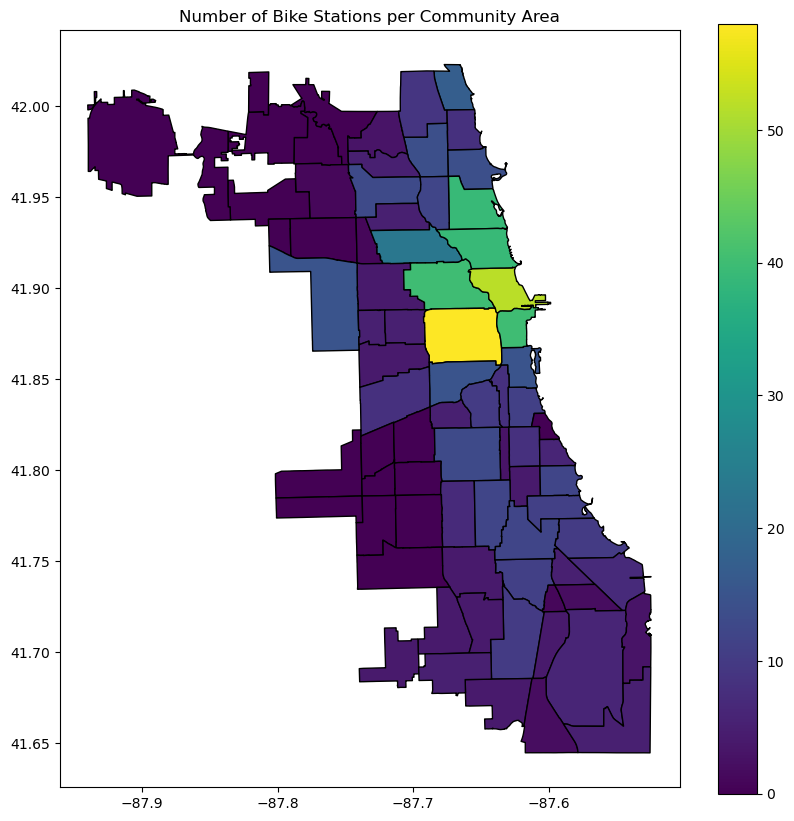

In [55]:
"""
TODO:
We want to understand which community areas have bike stations. Using `geopandas`, 
generate a plot of the number of stations per community area. This can be 
accomplished by aggregating the stations by community area. Then use the `plot()` 
command to generate a chloropleth map. You are allowed to define a colormap for 
your chloropleth map via the `cmap` parameter.
"""

import geopandas as gpd
import matplotlib.pyplot as plt

# aggregate the number of stations by community area
station_counts = station_community_df.groupby('area_number').size().reset_index(name='station_count')

# merge the station counts with the community area data
community_area_stations = community_pr_df.merge(station_counts, on='area_number', how='left')

# fill in any missing station counts with 0
community_area_stations['station_count'] = community_area_stations['station_count'].fillna(0)


# create a chloropleth map and use the 'station_count' column to determine the color of each community area
ax = community_area_stations.plot(column='station_count', cmap='viridis', legend=True, figsize=(10, 10), edgecolor='black')

# set a title for the plot
ax.set_title('Number of Bike Stations per Community Area')

# Show the plot
plt.show()


